# Apriori Algorithm

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import association_rules, apriori

In [2]:
# Import dataframe
df = pd.read_csv("bread basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
# Columns in dataframe
df.columns

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')

In [4]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
# Check for null values in each column
df.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [7]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])

In [8]:
# Count of unique customers
df['Transaction'].nunique()

9465

In [9]:
# Extracting date
df['date'] = df['date_time'].dt.date

In [10]:
#Extracting time
df['time'] = df['date_time'].dt.time

In [11]:
# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [12]:
# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

In [13]:
# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [14]:
# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)

In [15]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [16]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


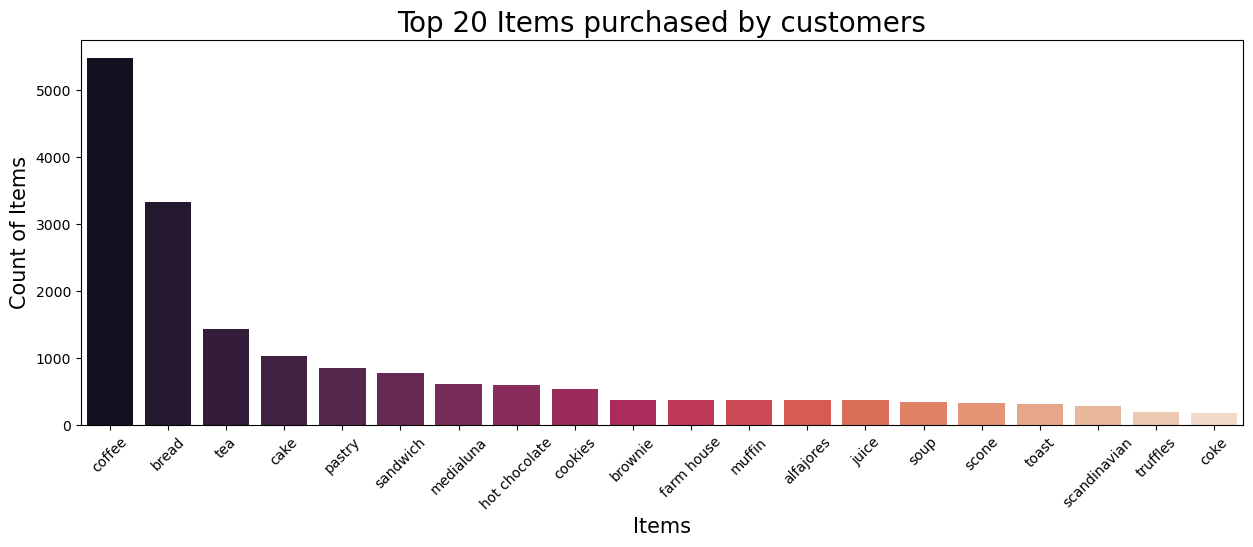

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'rocket')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', size = 20)
plt.show()

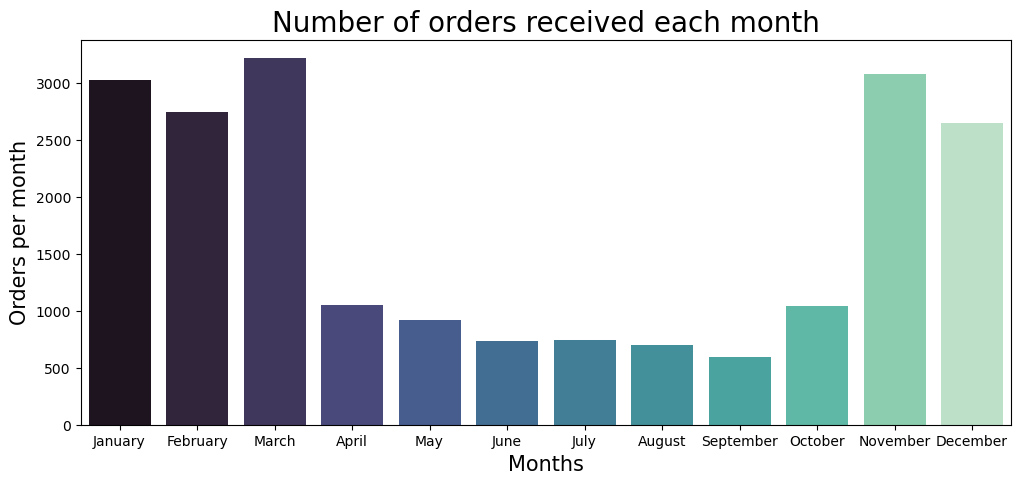

In [18]:
monthlyTransactions = df.groupby('month')['Transaction'].count().reset_index()
monthlyTransactions.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthlyTransactions.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthlyTransactions, x = "month", y = "Transaction", palette='mako')
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', size = 20)
plt.show()


plt.show()

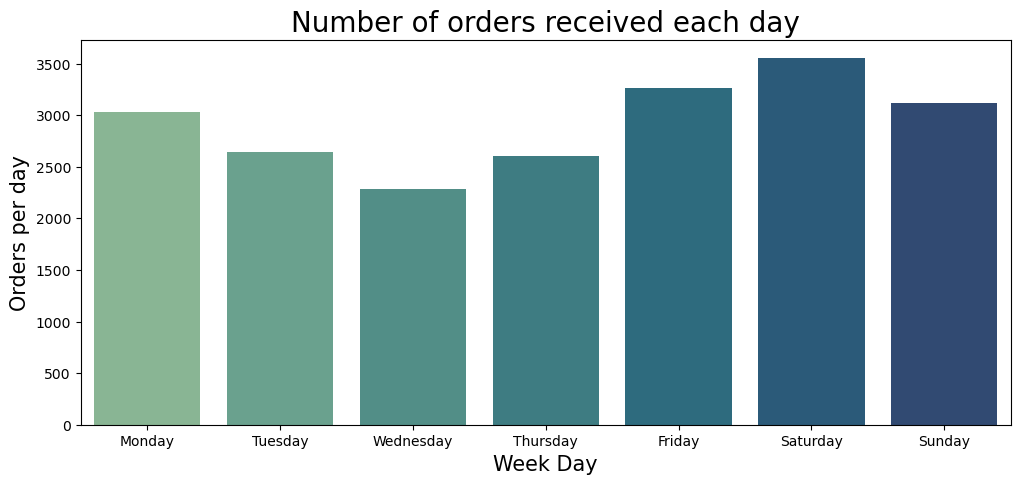

In [19]:
weeklyTransactions = df.groupby('weekday')['Transaction'].count().reset_index()
weeklyTransactions.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weeklyTransactions.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weeklyTransactions, x = "weekday", y = "Transaction", palette='crest')
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', size = 20)
plt.show()


plt.show()

In [20]:
dates = df.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

dates = pd.merge(dates, df[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2016-05-11,275,Wednesday
275,2016-11-19,209,Saturday
484,2016-12-11,221,Sunday
705,2017-01-28,237,Saturday
942,2017-02-18,227,Saturday
1169,2017-03-25,246,Saturday
1415,2017-04-02,292,Sunday
1707,2017-04-03,257,Monday
1964,2017-08-04,205,Friday
2169,2017-11-03,203,Friday


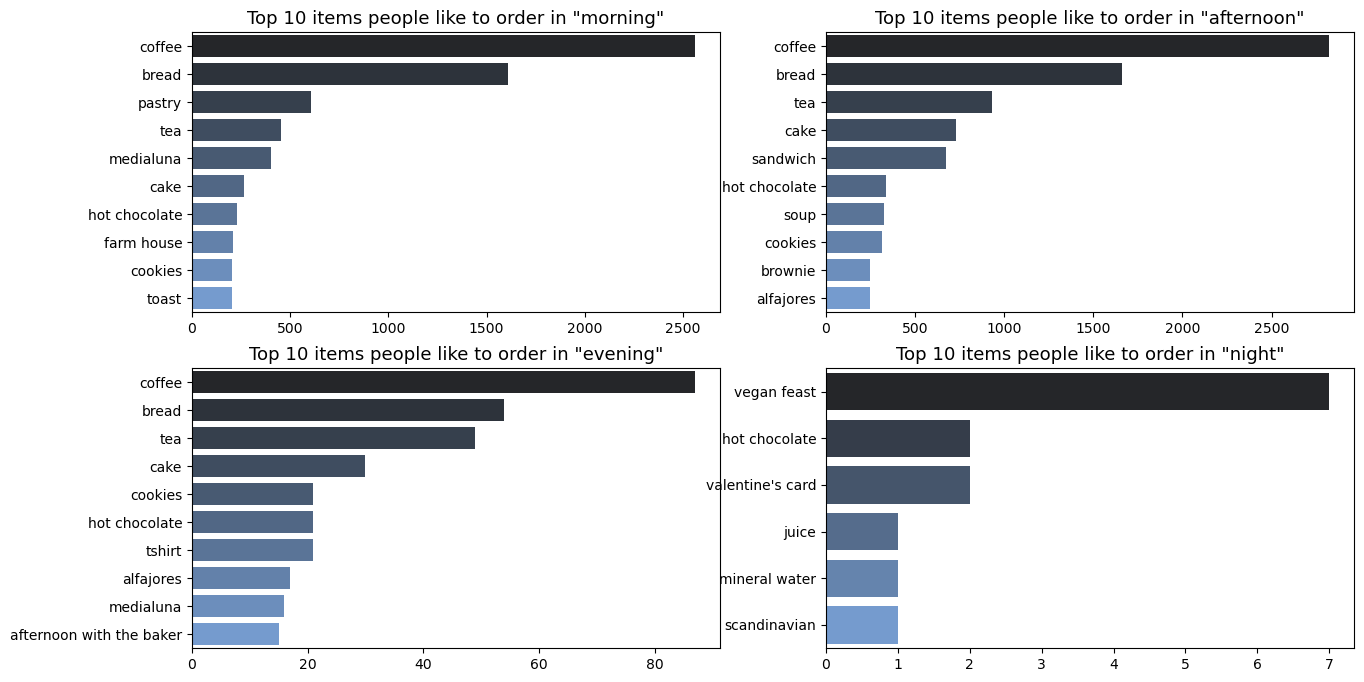

In [21]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, palette='dark:#69d')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

In [22]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str.head()

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1


In [23]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

basket_sets = basket.applymap(encode)
basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(basket_sets.astype('bool'), min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(coffee, bread, cake)"
59,0.011199,"(coffee, bread, pastry)"


In [26]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
